In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

['WorldCups.csv', 'WorldCupMatches.csv', 'WorldCupPlayers.csv']


use ```encoding='Latin-1'``` to show 'Nou Camp - Estadio Le�n' as ‘Nou Camp - Estadio Leï¿½n’

In [2]:
match_df = pd.read_csv('../input/WorldCupMatches.csv', encoding='Latin-1')
player_df = pd.read_csv('../input/WorldCupPlayers.csv', encoding='Latin-1')
cup_df = pd.read_csv('../input/WorldCups.csv', encoding='Latin-1')

In [3]:
match_df.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


In [4]:
cup_df.head(3)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700


In [5]:
match_df.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [6]:
match_df.dropna(inplace=True)

In [7]:
match_df = match_df.replace('Germany FR', 'Germany')

In [8]:
match_df['Year'] = match_df['Year'].astype('int')

In [9]:
cup_df.replace('Germany FR', 'Germany', inplace=True)

In [10]:
cup_df['Attendance'] = cup_df['Attendance'].str.replace('.', '')

In [11]:
match_df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [12]:
cup_df.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607


```match_df.groupby('Year')['Attendance'].sum()``` -> df.Series
```match_df.groupby('Year')['Attendance'].sum().to_frame()``` -> df, do not create new index
```match_df.groupby('Year')['Attendance'].sum().reset_index()``` -> df, make new index

In [13]:
match_df.groupby('Year')['Attendance'].sum().to_frame().head(3)

,Attendance
Year,
1930,590549.0
1934,363000.0
1938,375700.0


In [14]:
match_df.groupby('Year')['Attendance'].sum().reset_index().head(3)

,Year,Attendance
0,1930,590549.0
1,1934,363000.0
2,1938,375700.0


 Attendance of each year

- bar - total
- line - average

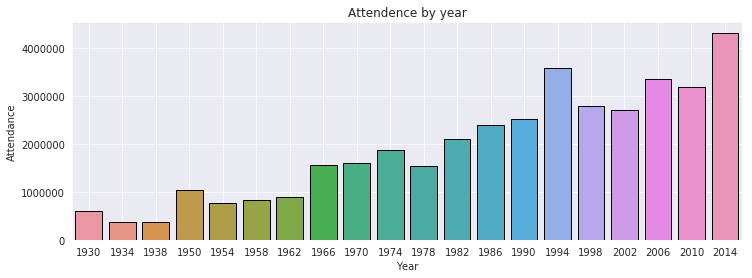

In [15]:
year_attend_df = match_df.groupby('Year')['Attendance'].sum().reset_index()

plt.figure(figsize=(12,4))
sns.barplot(data=year_attend_df, x='Year', y='Attendance', linewidth=1, edgecolor='K')
plt.grid(True)
plt.title('Attendence by year')
plt.show()

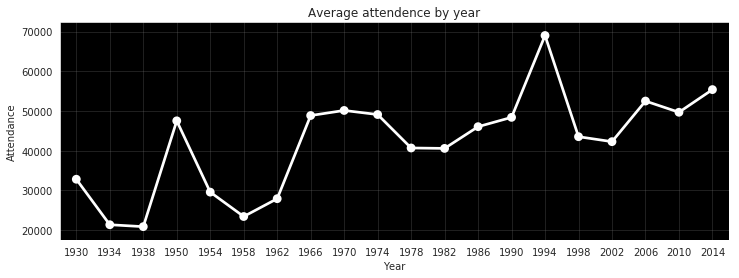

In [16]:
year_attend_mean_df = match_df.groupby('Year')['Attendance'].mean().reset_index()

plt.figure(figsize=(12,4))
ax = sns.pointplot(year_attend_mean_df['Year'], year_attend_mean_df['Attendance'], color='w')
ax.set_facecolor('k')
plt.grid(True, color='grey', alpha=0.3)
plt.title('Average attendence by year')
plt.show()

Total goals of each year

AttributeError: 'str' object has no attribute 'sqrt'

In [17]:
cup_df['Attendance'] = cup_df['Attendance'].astype('int')

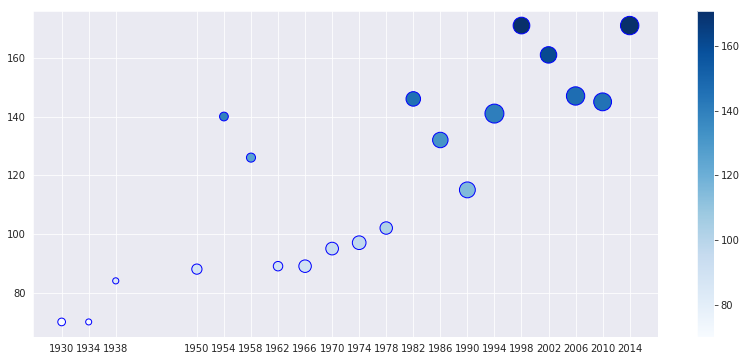

In [18]:
plt.figure(figsize=(14,6))
# sns.scatterplot(data=cup_df, x='Year', y='GoalsScored', c=cup_df['GoalsScored'],cmap='inferno')
# always error, complicated compared to plt.scatter

# plt.scatter(data=cup_df, x='Year', y='GoalsScored', c='GoalsScored', s='Attendance'*0.0001)
#TypeError: can't multiply sequence by non-int of type 'float'

plt.scatter(data=cup_df, x='Year', y='GoalsScored', 
            c='GoalsScored', s=cup_df['Attendance']*0.0001, cmap='Blues',
            linewidth=1 ,edgecolor='blue')
plt.colorbar()
plt.xticks(cup_df['Year'].unique())
plt.show()
# gray_r,inferno, https://blog.csdn.net/Mr_Cat123/article/details/78638491

Match that has the largest attendance

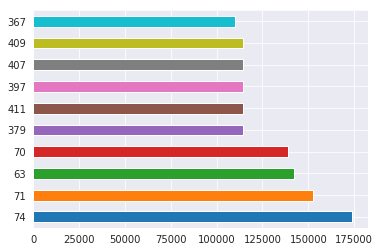

In [19]:
match_df.sort_values(by='Attendance', ascending=False)[:10]['Attendance'].plot(kind='barh')

In [20]:
top_attend_match_df = match_df.sort_values(by='Attendance',ascending=False)[:10]
top_attend_match_df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
74,1950,16 Jul 1950 - 15:00,Group 6,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filho,Rio De Janeiro,Uruguay,2.0,1.0,Brazil,,173850.0,0.0,0.0,READER George (ENG),ELLIS Arthur (ENG),MITCHELL George (SCO),209.0,1190.0,URU,BRA
71,1950,13 Jul 1950 - 15:00,Group 6,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filho,Rio De Janeiro,Brazil,6.0,1.0,Spain,,152772.0,3.0,0.0,LEAFE Reginald (ENG),MITCHELL George (SCO),DA COSTA VIEIRA Jose (POR),209.0,1186.0,BRA,ESP
63,1950,01 Jul 1950 - 15:00,Group 1,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filho,Rio De Janeiro,Brazil,2.0,0.0,Yugoslavia,,142429.0,1.0,0.0,GRIFFITHS Benjamin (WAL),BERANEK Alois (AUT),DA COSTA VIEIRA Jose (POR),208.0,1191.0,BRA,YUG
70,1950,09 Jul 1950 - 15:00,Group 6,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filho,Rio De Janeiro,Brazil,7.0,1.0,Sweden,,138886.0,3.0,0.0,ELLIS Arthur (ENG),GARCIA Prudencio (USA),DE LA SALLE Charles (FRA),209.0,1189.0,BRA,SWE
379,1986,07 Jun 1986 - 12:00,Group B,Estadio Azteca,Mexico City,Mexico,1.0,1.0,Paraguay,,114600.0,1.0,0.0,COURTNEY George (ENG),FREDRIKSSON Erik (SWE),IGNA Ioan (ROU),308.0,680.0,MEX,PAR


In [21]:
top_attend_match_df['vs'] = top_attend_match_df['Home Team Name'].str.cat(top_attend_match_df['Away Team Name'], sep=' .vs. ')

In [22]:
top_attend_match_df['Match Team'] = top_attend_match_df['Home Team Name'] + ' .VS. ' + top_attend_match_df['Away Team Name']

In [23]:
top_attend_match_df['date'] = top_attend_match_df['Datetime'].str.split('-').str[0]

In [24]:
top_attend_match_df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,vs,Match Team,date
74,1950,16 Jul 1950 - 15:00,Group 6,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filho,Rio De Janeiro,Uruguay,2.0,1.0,Brazil,,173850.0,0.0,0.0,READER George (ENG),ELLIS Arthur (ENG),MITCHELL George (SCO),209.0,1190.0,URU,BRA,Uruguay .vs. Brazil,Uruguay .VS. Brazil,16 Jul 1950
71,1950,13 Jul 1950 - 15:00,Group 6,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filho,Rio De Janeiro,Brazil,6.0,1.0,Spain,,152772.0,3.0,0.0,LEAFE Reginald (ENG),MITCHELL George (SCO),DA COSTA VIEIRA Jose (POR),209.0,1186.0,BRA,ESP,Brazil .vs. Spain,Brazil .VS. Spain,13 Jul 1950
63,1950,01 Jul 1950 - 15:00,Group 1,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filho,Rio De Janeiro,Brazil,2.0,0.0,Yugoslavia,,142429.0,1.0,0.0,GRIFFITHS Benjamin (WAL),BERANEK Alois (AUT),DA COSTA VIEIRA Jose (POR),208.0,1191.0,BRA,YUG,Brazil .vs. Yugoslavia,Brazil .VS. Yugoslavia,01 Jul 1950
70,1950,09 Jul 1950 - 15:00,Group 6,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filho,Rio De Janeiro,Brazil,7.0,1.0,Sweden,,138886.0,3.0,0.0,ELLIS Arthur (ENG),GARCIA Prudencio (USA),DE LA SALLE Charles (FRA),209.0,1189.0,BRA,SWE,Brazil .vs. Sweden,Brazil .VS. Sweden,09 Jul 1950
379,1986,07 Jun 1986 - 12:00,Group B,Estadio Azteca,Mexico City,Mexico,1.0,1.0,Paraguay,,114600.0,1.0,0.0,COURTNEY George (ENG),FREDRIKSSON Erik (SWE),IGNA Ioan (ROU),308.0,680.0,MEX,PAR,Mexico .vs. Paraguay,Mexico .VS. Paraguay,07 Jun 1986


In [25]:
text = ' Stadium: ' + top_attend_match_df['Stadium'].str.split('-').str[0] + ', Date: ' + top_attend_match_df['date']

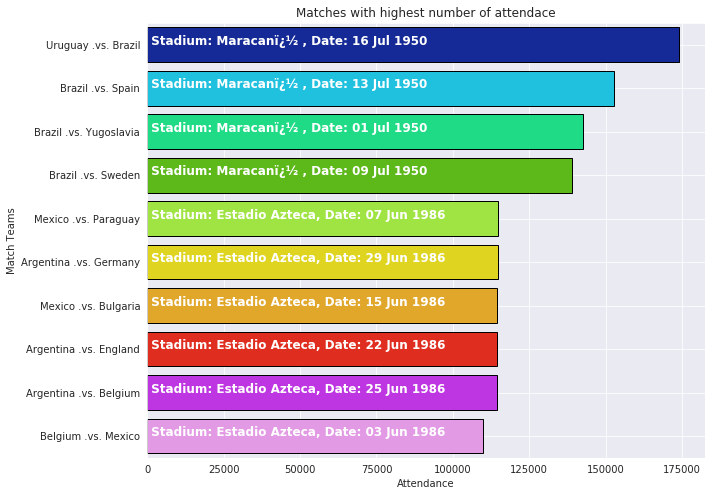

In [26]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=top_attend_match_df, x='Attendance', y='vs',palette='gist_ncar', 
            linewidth=1, edgecolor='k')
plt.ylabel('Match Teams')
plt.xlabel('Attendance')
plt.title('Matches with highest number of attendace')
plt.grid(True)
for i,j in enumerate(text):
    ax.text(x=1,y=i,s=j, fontsize=12, color='w', weight='bold')
    
# ax.text(x, y, s, fontdict=None, withdash=False, **kwargs)

In [27]:
top_attend_match_df['Stadium'].str.split('-').str[0]
# data_df['col_1'].str.split('-').str[0]

74        Maracanï¿½ 
71        Maracanï¿½ 
63        Maracanï¿½ 
70        Maracanï¿½ 
379    Estadio Azteca
411    Estadio Azteca
397    Estadio Azteca
407    Estadio Azteca
409    Estadio Azteca
367    Estadio Azteca
Name: Stadium, dtype: object

In [28]:
'Stadium: ' + top_attend_match_df['Stadium'].str.split('-').str[0]

74        Stadium: Maracanï¿½ 
71        Stadium: Maracanï¿½ 
63        Stadium: Maracanï¿½ 
70        Stadium: Maracanï¿½ 
379    Stadium: Estadio Azteca
411    Stadium: Estadio Azteca
397    Stadium: Estadio Azteca
407    Stadium: Estadio Azteca
409    Stadium: Estadio Azteca
367    Stadium: Estadio Azteca
Name: Stadium, dtype: object

Stadium that has the largest Attendance

In [29]:
attend_stadium_df = match_df.groupby(['Stadium','City'])['Attendance'].mean().reset_index()
attend_stadium_df.head()

,Stadium,City,Attendance
0,Arena Amazonia,Manaus,40056.750000
1,Arena Fonte Nova,Salvador,50385.000000
2,Arena Pantanal,Cuiaba,39679.250000
3,Arena Pernambuco,Recife,41020.666667
4,Arena da Baixada,Curitiba,39247.750000


In [30]:
top_attend_stadium_df = attend_stadium_df.sort_values('Attendance', ascending=False)[:10]
top_attend_stadium_df['Stadium_short'] = top_attend_stadium_df['Stadium'].str.split('-').str[0]
# for below test, create the stadium_short column
top_attend_stadium_df

,Stadium,City,Attendance,Stadium_short
99,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filho,Rio De Janeiro,101692.625000,Maracanï¿½
32,Estadio Azteca,Mexico City,100923.684211,Estadio Azteca
137,Rose Bowl,Los Angeles,92600.875000,Rose Bowl
179,Wembley Stadium,London,86448.222222,Wembley Stadium
151,Soccer City Stadium,Johannesburg,83857.375000,Soccer City Stadium
146,Santiago Bernabeu,Madrid,82522.250000,Santiago Bernabeu
167,Stanford Stadium,San Francisco,81737.333333,Stanford Stadium
159,Stade de France,Saint-Denis,78222.222222,Stade de France
48,Estadio do Maracana,Rio De Janeiro,74197.100000,Estadio do Maracana
64,Giants Stadium,New York/New Jersey,73689.714286,Giants Stadium


So, how to get each stadium's location / city for visualization

there are 2ways to find stadiums' city, but really complicated!!!!

the simplest way is get the city name when you groupby

In [31]:
top_attend_stadium_df['Stadium'].tolist()

['Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filho',
 'Estadio Azteca',
 'Rose Bowl',
 'Wembley Stadium',
 'Soccer City Stadium',
 'Santiago Bernabeu',
 'Stanford Stadium',
 'Stade de France',
 'Estadio do Maracana',
 'Giants Stadium']

In [32]:
match_df[match_df['Stadium'].isin(top_attend_stadium_df['Stadium'].tolist())][['Stadium','City']].drop_duplicates()
# can not use teh stadium name after split, or can not find its city name in the origin data_df

,Stadium,City
53,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filho,Rio De Janeiro
168,Wembley Stadium,London
200,Estadio Azteca,Mexico City
347,Santiago Bernabeu,Madrid
467,Giants Stadium,New York/New Jersey
468,Rose Bowl,Los Angeles
473,Stanford Stadium,San Francisco
516,Stade de France,Saint-Denis
708,Soccer City Stadium,Johannesburg
782,Estadio do Maracana,Rio De Janeiro


In [33]:
match_df.loc[match_df['Stadium'].isin(top_attend_stadium_df['Stadium'].tolist())][['Stadium', 'City']].drop_duplicates()

,Stadium,City
53,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filho,Rio De Janeiro
168,Wembley Stadium,London
200,Estadio Azteca,Mexico City
347,Santiago Bernabeu,Madrid
467,Giants Stadium,New York/New Jersey
468,Rose Bowl,Los Angeles
473,Stanford Stadium,San Francisco
516,Stade de France,Saint-Denis
708,Soccer City Stadium,Johannesburg
782,Estadio do Maracana,Rio De Janeiro


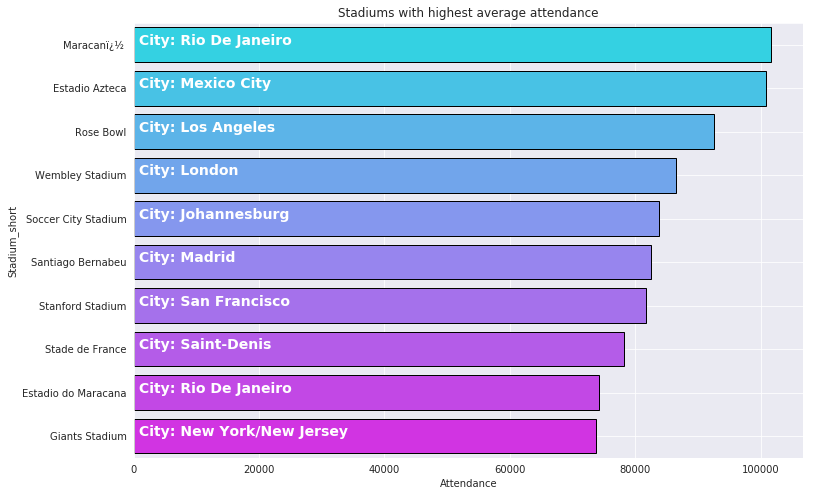

In [34]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=top_attend_stadium_df, x='Attendance', y='Stadium_short', linewidth=1, edgecolor='k', palette='cool')
for i,j in enumerate(' City: '+top_attend_stadium_df['City']):
    ax.text(1,i,j, fontsize=14, color='white', weight='bold')
plt.grid(True)
plt.title('Stadiums with highest average attendance')
plt.show()

which country got  winner the most

In [35]:
cup_df.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607


In [36]:
# cup_df.groupby(['Winner','Year'])['Winner'].count()

In [37]:
cup_df['Year'] = cup_df['Year'].astype('str')

In [38]:
winner_year_df = cup_df.groupby('Winner')['Year'].apply(', '.join).reset_index()
# TypeError: sequence item 0: expected str instance, int found
# winner_year_df.columns = [['Winner','Year']]
winner_year_df.head()

,Winner,Year
0,Argentina,"1978, 1986"
1,Brazil,"1958, 1962, 1970, 1994, 2002"
2,England,1966
3,France,1998
4,Germany,"1954, 1974, 1990, 2014"


In [39]:
# winner_year_count_df = cup_df['Winner'].value_counts().reset_index()
# winner_year_count_df.columns = [['Winner','count']]
# ValueError: The column label 'Winner' is not unique.
# For a multi-index, the label must be a tuple with elements corresponding to each level.

winner_year_count_df = cup_df['Winner'].value_counts().reset_index()
winner_year_count_df.columns = ['Winner','count']
winner_year_count_df.head()

,Winner,count
0,Brazil,5
1,Italy,4
2,Germany,4
3,Argentina,2
4,Uruguay,2


for merge together, need to rename and generate a foreigner_key

In [40]:
# way two
# winner_year_count_df = cup_df.groupby('Winner')['Year'].count().reset_index()
# winner_year_count_df.columns = ['Winner', 'count']

In [41]:
winner_year_merge_df = pd.merge(winner_year_df,winner_year_count_df, on='Winner', how='left')
winner_year_merge_df.sort_values(by='count', inplace=True, ascending=False)
winner_year_merge_df

,Winner,Year,count
1,Brazil,"1958, 1962, 1970, 1994, 2002",5
4,Germany,"1954, 1974, 1990, 2014",4
5,Italy,"1934, 1938, 1982, 2006",4
0,Argentina,"1978, 1986",2
7,Uruguay,"1930, 1950",2
2,England,1966,1
3,France,1998,1
6,Spain,2010,1


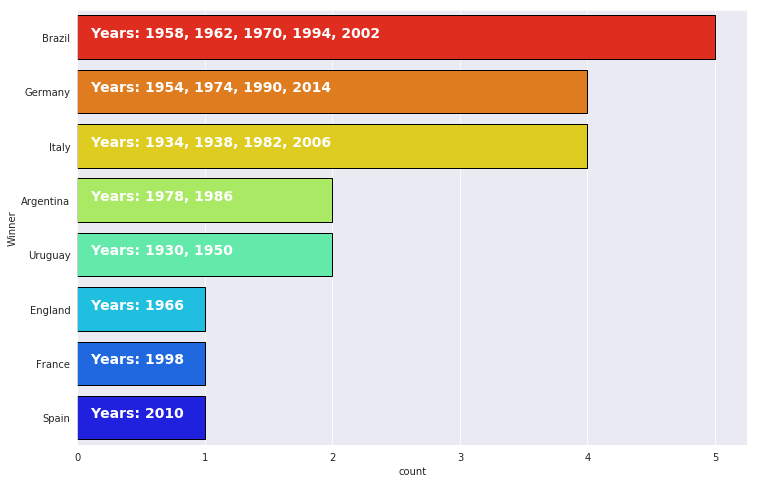

In [42]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=winner_year_merge_df, x='count', y='Winner', linewidth=1, edgecolor='k', palette='jet_r')
for i,j in enumerate('Years: '+winner_year_merge_df['Year']):
    ax.text(0.1, i,j, fontsize=14, color='white', weight='bold')

결승전 Winner vs Runner-up count

In [43]:
winner_df = cup_df.Winner.value_counts().reset_index()
winner_df

,index,Winner
0,Brazil,5
1,Italy,4
2,Germany,4
3,Argentina,2
4,Uruguay,2
5,France,1
6,England,1
7,Spain,1


In [44]:
runnerup_df = cup_df['Runners-Up'].value_counts().reset_index()
runnerup_df

,index,Runners-Up
0,Germany,4
1,Netherlands,3
2,Argentina,3
3,Czechoslovakia,2
4,Italy,2
5,Brazil,2
6,Hungary,2
7,France,1
8,Sweden,1


In [45]:
win_run_merge_df = pd.merge(winner_df, runnerup_df,on='index', how='outer')
win_run_merge_df

,index,Winner,Runners-Up
0,Brazil,5.0,2.0
1,Italy,4.0,2.0
2,Germany,4.0,4.0
3,Argentina,2.0,3.0
4,Uruguay,2.0,NaN
5,France,1.0,1.0
6,England,1.0,NaN
7,Spain,1.0,NaN
8,Netherlands,NaN,3.0
9,Czechoslovakia,NaN,2.0


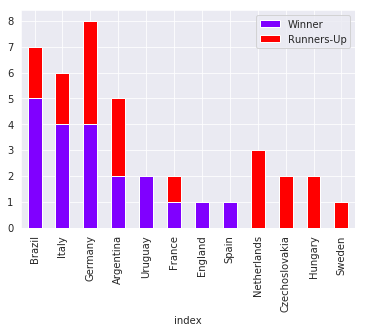

In [46]:
win_run_merge_df.plot(kind='bar', x='index',stacked=True, cmap='rainbow')

In [47]:
winner_df['type'] = 'winner'
winner_df.columns = ['index','count','type']
runnerup_df['type'] = 'runner_up'
runnerup_df.columns = ['index','count','type']

In [48]:
winner_df

,index,count,type
0,Brazil,5,winner
1,Italy,4,winner
2,Germany,4,winner
3,Argentina,2,winner
4,Uruguay,2,winner
5,France,1,winner
6,England,1,winner
7,Spain,1,winner


In [49]:
runnerup_df

,index,count,type
0,Germany,4,runner_up
1,Netherlands,3,runner_up
2,Argentina,3,runner_up
3,Czechoslovakia,2,runner_up
4,Italy,2,runner_up
5,Brazil,2,runner_up
6,Hungary,2,runner_up
7,France,1,runner_up
8,Sweden,1,runner_up


In [50]:
win_run_df = pd.concat([winner_df, runnerup_df], axis=0, )
win_run_df

,index,count,type
0,Brazil,5,winner
1,Italy,4,winner
2,Germany,4,winner
3,Argentina,2,winner
4,Uruguay,2,winner
5,France,1,winner
6,England,1,winner
7,Spain,1,winner
0,Germany,4,runner_up
1,Netherlands,3,runner_up


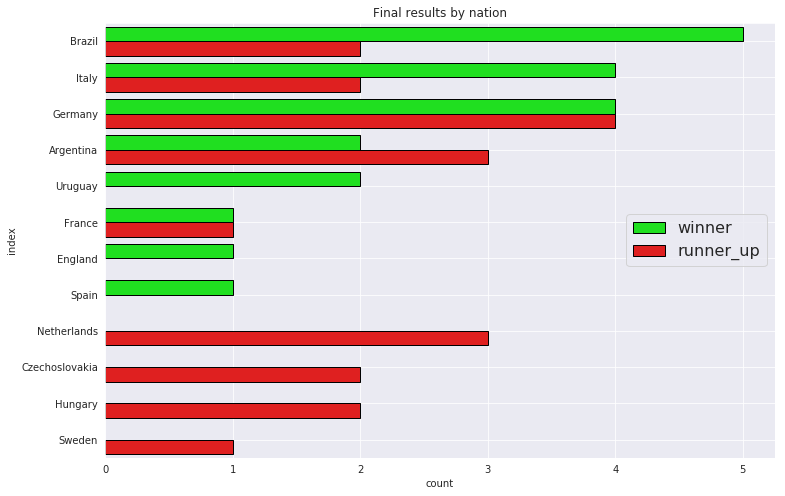

In [51]:
plt.figure(figsize=(12,8))
sns.barplot(data=win_run_df, x='count', y='index', hue='type',palette=['lime', 'r'], linewidth=1, edgecolor='k')
plt.legend(loc='center right' ,prop={'size':16})
plt.grid(True)
plt.title('Final results by nation')
plt.show()

network  relationship graph

In [52]:
import networkx as nx

In [53]:
def network_graph(year,color):
    df = match_df[match_df['Year']==year][['Home Team Name', 'Away Team Name']]
    g = nx.from_pandas_edgelist(df, 'Home Team Name', 'Away Team Name')
    
    plt.figure(figsize=(16,9))
    nx.draw_kamada_kawai(g,with_labels=True,
                         node_size=2500,
                         node_color=color,
                         node_shape='h',
                         edgecolor='k',
                         linewidths=5,
                         font_size=12,
                         alpha=.8)
    plt.title('Interaction between teams: ' + str(year), fontsize=12)
    plt.show()

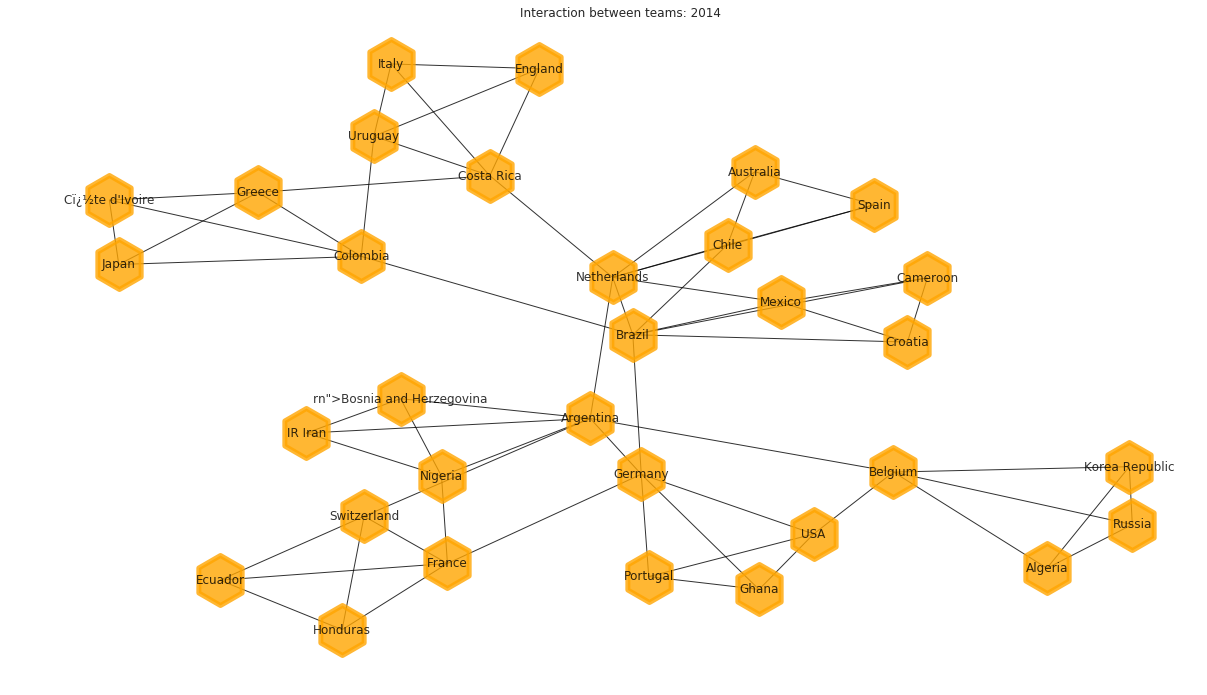

In [56]:
network_graph(2014,'Orange')